In [1]:
# Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import pylab as pl
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import histogram
import random
import seaborn as sns
import scipy.stats as stats
import statistics
from statsmodels.distributions.empirical_distribution import ECDF
from __future__ import division

In [2]:
# Load the dataset
mortalitad_materna = pd.read_csv('data/mortalidad_materna.csv')
#materna.info()

## Create a **materna** subdataset *in English* from the **maternalidad_materna** dataset *in Spanish* with information including: 
#### - Residence Area
#### - Local Community Size
#### - Total Education Completed 
#### - Last Recorded Age
#### - Reason for Mortality
#### - Medical Assistance

### Step 1: Explore the Data and Create Clean Sub-Dataframe for Analysis

In [3]:
# 1. Combine patient birthdate information into one column
birth = DataFrame(mortalitad_materna, columns=['Año de nacimiento', 'Mes de nacimiento', 'Día de nacimiento'])
birth = mortalitad_materna['Año de nacimiento'].map(str) + '-' + mortalitad_materna['Mes de nacimiento'].map(str) + '-' + mortalitad_materna['Mes de nacimiento'].map(str)
print(birth.sort_values(ascending=True).head(2))
len(birth)

13088    0-0-0
12833    0-0-0
dtype: object


18163

In [4]:
# Combine patient date of death information into one column
death = DataFrame(mortalitad_materna, columns=['Año de la defunción', 'Mes de la defunción', 'Día de la defunción'])
death = mortalitad_materna['Año de la defunción'].map(str) + '-' + mortalitad_materna['Mes de la defunción'].map(str) + '-' + mortalitad_materna['Mes de la defunción'].map(str)
print(death.sort_values(ascending=True).head(2))
len(death)

17886       0-0-0
17516    1914-3-3
dtype: object


18163

#### Create variables for important location, economic, and educational factors associated with the instance of maternal mortality:
- Residence Area
- Local Community Size
- Total Education Completed 
- Last Recorded Age
- Reason for Mortality
- Medical Assistance

In [5]:
# Create variable to store:

#residence information 
residence_code = mortalitad_materna['Entidad de residencia']
residence_name = mortalitad_materna['Descripción de entidad de residencia']

#local community info
local_size = mortalitad_materna['Descripción del tamaño de localidad']

#educational level
edu_reached_code = mortalitad_materna['Escolaridad'] 
edu_reached = mortalitad_materna['Descripción de la escolaridad']

#age fulfilled by patient
last_age = mortalitad_materna['Edad cumplida']

#mortality reason
mortality_reason = mortalitad_materna['Razón de mortalidad materna']

#medical assistance
medical_received = mortalitad_materna['Descripción de la asistencia médica']

In [6]:
# Create a sub-dataframe to hold all date- information 
materna = pd.concat([birth, 
                   death, 
                   residence_code,
                   residence_name,
                   local_size,
                   edu_reached_code,
                   edu_reached,
                   last_age,
                   mortality_reason,
                   medical_received], axis=1)
materna.columns = ['Date of Birth', 
                 'Date of Mortality', 
                 'Residence Code',
                 'Residence Name',
                 'Local Community Size',
                 'Education Code',
                 'Education Completed',
                 'Age at Death',
                 'Reason for Mortality',
                 'Medical Assistance Received']
    
materna.head(2)

,Date of Birth,Date of Mortality,Residence Code,Residence Name,Local Community Size,Education Code,Education Completed,Age at Death,Reason for Mortality,Medical Assistance Received
0,1972-7-7,2002-3-3,29,Tlaxcala,40000 a 49999 habitantes,7,PROFESIONAL,29,1,CON ATENCION MEDICA
1,1967-4-4,2003-5-5,29,Tlaxcala,40000 a 49999 habitantes,6,BACHILLERATO O PREPARATORIA COMPLETA,36,1,CON ATENCION MEDICA


### Data Wrangling: 
**Part 1**: Check for null or errors within **materna**

**Part 2**: Translate important columns in **materna** into English *using translation_english.txt*

#### Part 1: Check for null or errors within materna

In [7]:
# Order dataframe to list in ascending order of approx. age at death
materna = materna.sort_values(by=['Age at Death'],ascending=True)
materna.head()

,Date of Birth,Date of Mortality,Residence Code,Residence Name,Local Community Size,Education Code,Education Completed,Age at Death,Reason for Mortality,Medical Assistance Received
9598,1998-7-7,2009-7-7,7,Chiapas,1 a 999 habitantes,2,PRIMARIA INCOMPLETA,11,1,CON ATENCION MEDICA
6407,1996-1-1,2008-12-12,30,Veracruz de Ignacio de la Llave,50000 a 74999 habitantes,3,PRIMARIA COMPLETA,12,1,CON ATENCION MEDICA
9084,2001-12-12,2014-5-5,27,Tabasco,250000 a 499999 habitantes,4,SECUNDARIA INCOMPLETA,12,1,CON ATENCION MEDICA
10883,1983-11-11,2002-6-6,15,México,2500 a 4999 habitantes,5,SECUNDARIA COMPLETA,12,1,CON ATENCION MEDICA
1266,1993-0-0,2005-1-1,12,Guerrero,2500 a 4999 habitantes,2,PRIMARIA INCOMPLETA,12,1,SIN ATENCION MEDICA


In [8]:
# Reset Index 
materna = materna.reset_index(drop=True)
materna.head()
materna.tail()

,Date of Birth,Date of Mortality,Residence Code,Residence Name,Local Community Size,Education Code,Education Completed,Age at Death,Reason for Mortality,Medical Assistance Received
18158,0-0-0,1975-2-2,25,Sinaloa,1 a 999 habitantes,0,NO ESPECIFICADO,998,0,NO ESPECIFICADO
18159,0-0-0,2006-9-9,27,Tabasco,75000 a 99999 habitantes,1,NINGUNA,998,1,NO ESPECIFICADO
18160,0-0-0,2000-6-6,16,Michoacán de Ocampo,No Especificado.,0,NO ESPECIFICADO,998,0,NO ESPECIFICADO
18161,0-0-0,0-0-0,0,No especificado,No Especificado.,0,NO ESPECIFICADO,998,0,SIN ATENCION MEDICA
18162,0-0-0,2002-4-4,8,Chihuahua,1 a 999 habitantes,2,PRIMARIA INCOMPLETA,998,1,CON ATENCION MEDICA


#### Check if all values make sense
- Case 1: It is biologically impossible to reach 998 years of age. These data entries appear to all have '0-0-0' in the 'Date of Birth' column and should therefore be removed from the sub-dataset, dates.
- Case 2: What do the '0' and '1' entires for 'Reason for Mortality' mean? If one of these keys is not associated with maternal death, then those entries should also be removed from the sub-dataset, dates.

In [9]:
# Remove rows with NaN / '0-0-0' values in Date of Birth
materna = materna[materna['Date of Birth'] != '0-0-0']
materna.tail()

,Date of Birth,Date of Mortality,Residence Code,Residence Name,Local Community Size,Education Code,Education Completed,Age at Death,Reason for Mortality,Medical Assistance Received
18134,1933-12-12,2015-8-8,9,Distrito Federal,500000 a 999999 habitantes,3,PRIMARIA COMPLETA,81,0,CON ATENCION MEDICA
18135,1933-11-11,2015-12-12,15,México,250000 a 499999 habitantes,2,PRIMARIA INCOMPLETA,82,0,CON ATENCION MEDICA
18136,1933-8-8,2015-9-9,24,San Luis Potosí,500000 a 999999 habitantes,2,PRIMARIA INCOMPLETA,82,0,CON ATENCION MEDICA
18137,1930-1-1,2016-2-2,14,Jalisco,500000 a 999999 habitantes,2,PRIMARIA INCOMPLETA,86,0,CON ATENCION MEDICA
18138,1930-8-8,2017-1-1,30,Veracruz de Ignacio de la Llave,1000 a 1999 habitantes,2,PRIMARIA INCOMPLETA,86,0,CON ATENCION MEDICA


In [10]:
materna.head()

,Date of Birth,Date of Mortality,Residence Code,Residence Name,Local Community Size,Education Code,Education Completed,Age at Death,Reason for Mortality,Medical Assistance Received
0,1998-7-7,2009-7-7,7,Chiapas,1 a 999 habitantes,2,PRIMARIA INCOMPLETA,11,1,CON ATENCION MEDICA
1,1996-1-1,2008-12-12,30,Veracruz de Ignacio de la Llave,50000 a 74999 habitantes,3,PRIMARIA COMPLETA,12,1,CON ATENCION MEDICA
2,2001-12-12,2014-5-5,27,Tabasco,250000 a 499999 habitantes,4,SECUNDARIA INCOMPLETA,12,1,CON ATENCION MEDICA
3,1983-11-11,2002-6-6,15,México,2500 a 4999 habitantes,5,SECUNDARIA COMPLETA,12,1,CON ATENCION MEDICA
4,1993-0-0,2005-1-1,12,Guerrero,2500 a 4999 habitantes,2,PRIMARIA INCOMPLETA,12,1,SIN ATENCION MEDICA


**Case 1 Conclusion**: It appears that removing rows with '0-0-0' in the 'Date of Birth' column did remove all entries outside of the biological scope of maximum age at death. However, it is unlikely that a women who reached the age of 81 died due to maternal reasons since this age is outside the childe-bearing years. The analysis of the '0' and '1' in the 'Reason for Mortality' column may shed more light since all younger ages seem to be associated with '1' while older ages are associated with '0'. 

In [11]:
# Create a variable for the description of Reason for Mortality Description
mortality_description = mortalitad_materna['Descripción de la razón de mortalidad materna']

# Create a sub-dataframe to show interaction of Reason for Mortality Code and Description
mortality = pd.concat([mortality_reason, mortality_description], axis=1)
mortality.columns = ['Reason Mortality Code', 'Reason Mortality Description']
mortality.head()

,Reason Mortality Code,Reason Mortality Description
0,1,Muertes Maternas para la razón de Mortalidad M...
1,1,Muertes Maternas para la razón de Mortalidad M...
2,1,Muertes Maternas para la razón de Mortalidad M...
3,1,Muertes Maternas para la razón de Mortalidad M...
4,1,Muertes Maternas para la razón de Mortalidad M...


In [12]:
mortality.tail()

,Reason Mortality Code,Reason Mortality Description
18158,0,Muertes Maternas excluidas para la razón de Mo...
18159,0,Muertes Maternas excluidas para la razón de Mo...
18160,0,Muertes Maternas excluidas para la razón de Mo...
18161,0,Muertes Maternas excluidas para la razón de Mo...
18162,0,Muertes Maternas excluidas para la razón de Mo...


In [13]:
print('0 Description:')
print('Spanish: Muertes Maternas excluidas para la razón de Mortalidad Materna')
print('English: Maternal deaths excluded for the reason of Maternal Mortality')

0 Description:
Spanish: Muertes Maternas excluidas para la razón de Mortalidad Materna
English: Maternal deaths excluded for the reason of Maternal Mortality


In [14]:
print('1 Description:')
print('Spanish: Muertes Maternas para la razón de Mortalidad Materna')
print('English: Maternal deaths for the reason of Maternal Mortality')

1 Description:
Spanish: Muertes Maternas para la razón de Mortalidad Materna
English: Maternal deaths for the reason of Maternal Mortality


**Case 2 Conclusion**: Since '1' refers to recorded maternal-deaths and '0' refers to recorded deaths that are *not* associated with maternity, all rows containing '0' in the 'Reason for Mortality' column should be removed.

In [15]:
# Remove rows with 0 values in Reason for Mortality
materna = materna[materna['Reason for Mortality'] != 0 ]
materna.tail()

,Date of Birth,Date of Mortality,Residence Code,Residence Name,Local Community Size,Education Code,Education Completed,Age at Death,Reason for Mortality,Medical Assistance Received
18113,1960-3-3,2010-10-10,12,Guerrero,1 a 999 habitantes,7,PROFESIONAL,50,1,CON ATENCION MEDICA
18116,1960-1-1,2011-10-10,12,Guerrero,1 a 999 habitantes,0,NO ESPECIFICADO,51,1,CON ATENCION MEDICA
18121,1963-12-12,2017-10-10,15,México,10000 a 14999 habitantes,7,PROFESIONAL,53,1,CON ATENCION MEDICA
18123,1961-8-8,2015-5-5,7,Chiapas,1000 a 1999 habitantes,1,NINGUNA,53,1,CON ATENCION MEDICA
18125,1942-12-12,2002-12-12,20,Oaxaca,2000 a 2499 habitantes,2,PRIMARIA INCOMPLETA,54,1,CON ATENCION MEDICA


#### Part 2: Translating Important Columns in **materna** from Spanish *using translation_english.txt*
- Important columns that need translation include: 
    - *Education Completed*
        - Translate Spanish Descriptions into Integer Values that Are Comparable
    - *Medical Assistance Received*
        - Translate Medical Assistance Received into a Binary Column

**Education Completed**
- 9
    - 'POSGRADO' = Post-Graduate Education
- 8
    - 'PROFESIONAL' = Professional School
- 7
    - 'BACHILLERATO O PREPARATORIA COMPLETA' = High School (grades 10-12) complete
- 6
    - 'BACHILLERATO O PREPARATORIA INCOMPLETA' = High School (grades 10-12) incomplete
- 5 
    - 'PRIMARIA COMPLETA' = Elementary School (grades 1-6) complete 
- 4 
    - 'PRIMARIA INCOMPLETA' = Elementary School (grades 1-6) incomplete
- 3 
    - 'SECUNDARIA COMPLETA' = Junior High (grades 7-9) complete
- 2
    - 'SECUNDARIA INCOMPLETA' = Junior High (grades 7-9) incomplete
- 1
   - 'PREESCOLAR' = Preschool complete
-  0 
    - Combine the following entries:'SE IGNORA' = It was 'ignored' / 'NO ESPECIFICADO' = Not specified / 'NINGUNA' = NONE

In [16]:
# Create a sub-dataframe to show interaction of Education Code and Education Completed
education = materna[['Education Code', 'Education Completed']].sort_values(by='Education Code')
education = education.drop_duplicates()
print(len(education))
education

12


,Education Code,Education Completed
12865,0,NO ESPECIFICADO
13582,1,NINGUNA
10135,2,PRIMARIA INCOMPLETA
9046,3,PRIMARIA COMPLETA
13586,4,SECUNDARIA INCOMPLETA
2278,5,SECUNDARIA COMPLETA
4727,6,BACHILLERATO O PREPARATORIA COMPLETA
11751,7,PROFESIONAL
8506,10,POSGRADO
10179,11,BACHILLERATO O PREPARATORIA INCOMPLETA


In [17]:
# Overwriting column with replaced value of Education

# SE IGNORA / NINGUNA / NO ESPECIFICADO
materna["Education Completed"]= materna["Education Completed"].replace(['SE IGNORA', 'NINGUNA', 'NO ESPECIFICADO'], 0)

# PREESCOLAR
materna["Education Completed"]= materna["Education Completed"].replace('PREESCOLAR', 1)

# PRIMARIA
#INCOMPLETA
materna["Education Completed"]= materna["Education Completed"].replace('PRIMARIA INCOMPLETA', 2)
#COMPLETA
materna["Education Completed"]= materna["Education Completed"].replace('PRIMARIA COMPLETA', 3)

# SECUNDARIA
#INCOMPLETA
materna["Education Completed"]= materna["Education Completed"].replace('SECUNDARIA INCOMPLETA', 4)
#COMPLETA
materna["Education Completed"]= materna["Education Completed"].replace('SECUNDARIA COMPLETA', 5)

# BACHILLERATO O PREPARATORIA
#INCOMPLETA
materna["Education Completed"]= materna["Education Completed"].replace('BACHILLERATO O PREPARATORIA INCOMPLETA', 6)
#COMPLETA
materna["Education Completed"]= materna["Education Completed"].replace('BACHILLERATO O PREPARATORIA COMPLETA', 7)

# PROFESIONAL
materna["Education Completed"]= materna["Education Completed"].replace('PROFESIONAL', 8)

#POSGRADO
materna["Education Completed"]= materna["Education Completed"].replace('POSGRADO', 9)


In [18]:
# Test output
list(materna['Education Completed'].sort_values().unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### Medical Assistance Received
- 0: WITH Medical Assistance
- 1: Unspecified/WITHOUT Medical Assistance

In [19]:
# Create a list item to hold comparison response
binary_medassist = []

# Create an iteration function to compare region mean to popupation mean
for medassist in materna['Medical Assistance Received']:
    
    #test for assistance
    if medassist == 'CON ATENCION MEDICA':
        binary_medassist.append(0)
    else:
        binary_medassist.append(1)

In [20]:
# Test output
#binary_medassist

In [21]:
# Convert the list to a Series and add as new column
materna['Received(0)/Not(1) Medical Assistance'] = pd.Series(binary_medassist)
materna.head()

,Date of Birth,Date of Mortality,Residence Code,Residence Name,Local Community Size,Education Code,Education Completed,Age at Death,Reason for Mortality,Medical Assistance Received,Received(0)/Not(1) Medical Assistance
0,1998-7-7,2009-7-7,7,Chiapas,1 a 999 habitantes,2,2,11,1,CON ATENCION MEDICA,0.0
1,1996-1-1,2008-12-12,30,Veracruz de Ignacio de la Llave,50000 a 74999 habitantes,3,3,12,1,CON ATENCION MEDICA,0.0
2,2001-12-12,2014-5-5,27,Tabasco,250000 a 499999 habitantes,4,4,12,1,CON ATENCION MEDICA,0.0
3,1983-11-11,2002-6-6,15,México,2500 a 4999 habitantes,5,5,12,1,CON ATENCION MEDICA,0.0
4,1993-0-0,2005-1-1,12,Guerrero,2500 a 4999 habitantes,2,2,12,1,SIN ATENCION MEDICA,1.0


In [22]:
# Drop 'Metropolitan Areas' column as it is unnecessary
materna = materna.drop(columns=['Date of Birth', 'Date of Mortality', 'Medical Assistance Received', 'Education Code', 'Reason for Mortality'])
materna.head()

,Residence Code,Residence Name,Local Community Size,Education Completed,Age at Death,Received(0)/Not(1) Medical Assistance
0,7,Chiapas,1 a 999 habitantes,2,11,0.0
1,30,Veracruz de Ignacio de la Llave,50000 a 74999 habitantes,3,12,0.0
2,27,Tabasco,250000 a 499999 habitantes,4,12,0.0
3,15,México,2500 a 4999 habitantes,5,12,0.0
4,12,Guerrero,2500 a 4999 habitantes,2,12,1.0


In [23]:
# Analyze shape of cleaned data
materna.describe()

,Residence Code,Education Completed,Age at Death,Received(0)/Not(1) Medical Assistance
count,16636.000000,16636.000000,16636.000000,15302.000000
mean,16.279574,4.023684,28.356756,0.142269
std,7.850170,2.387759,7.323171,0.349337
min,1.000000,0.000000,11.000000,0.000000
25%,10.000000,2.000000,22.000000,0.000000
50%,15.000000,4.000000,28.000000,0.000000
75%,21.000000,5.000000,34.000000,0.000000
max,34.000000,9.000000,54.000000,1.000000


### Step 2: Exploratory Data Analysis

## Question 1: What is the Mean Age of Maternal Mortality within the dataset? How does  compare to the Actual Mean Age of Maternal Mortality in Mexico?

In [24]:
# Create variable for maternal death
age_mortality = materna['Age at Death']

# Determine sample size for maternal death 
sample_size = len(age_mortality)
sample_size

16636

#### Plot Sample Age of Maternal Death Distribution

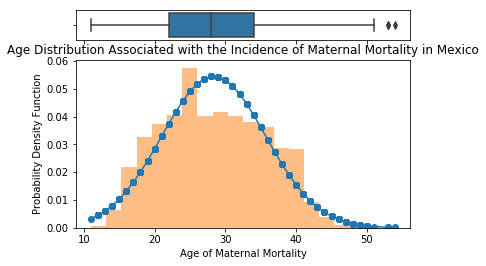

'The sample(n=16636) population mean age of maternal death is 28.36 years old with a standard deviation of 7.32.'

In [25]:
# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(age_mortality, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(age_mortality, np.mean(age_mortality), np.std(age_mortality))
pl.plot(age_mortality, fit, '-o')
pl.hist(age_mortality, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Age of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Age Distribution Associated with the Incidence of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(sample_size) + ') population mean age of maternal death is ' + str(round(np.mean(age_mortality), 2)) + ' years old with a standard deviation of ' + str(round(np.std(age_mortality), 2)) + '.'


*Preliminary* **Conclusion**: The distribution appears to be generally normally distributed based off of the histogram of the maternal age at time of death. Since binning bias can occur, the Cumulative Distribution Function (CDF) needs to be analyzed. Based off of the Central Limit Theorem (CLT), the sampling distribution of the sample means approaches a normal distribution as the sample size ( n ) gets larger - regardless of what the shape of the population distribution. Under this theorem,  n>30  is considered a large sample size. Since the current database sample size  n  = 16636, CLT can be assumed.

#### Create an Empirical and Theoretical Cumulative Distribution Function (CDF)

In [26]:
# Create an Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / len(data)

    return x, y

#### Seed a Random Number Generator and Calculate Theoretical Dataset with Normal Distribution

In [27]:
# Seed the random number generator
np.random.seed(15)

# Compute the theoretical CDF 
cdf_mean = np.mean(age_mortality)
cdf_std = np.std(age_mortality)

# Simulate a random sample with the same distribution and size of 10,000
cdf_samples = np.random.normal(cdf_mean, cdf_std, size=10000)
cdf_samples

array([26.06959029, 30.84132168, 27.21504589, ..., 33.86348911,
       22.34975498, 28.10388849])

#### Apply the ecdf() function to Empirical and Theoretical Data to Calculate the CDFs

In [28]:
# Compute the CDFs
x_death, y_death = ecdf(age_mortality)
x_norm, y_norm = ecdf(cdf_samples)

#### Plot the Theoretical (normalized) CDF with the Empirical (sample) CDF

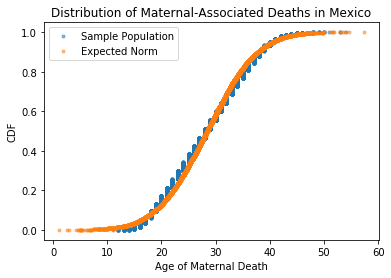

In [29]:
# Plot both ECDFs on same the same figure
fig = plt.plot(x_death, y_death, marker='.', linestyle='none', alpha=0.5)
fig = plt.plot(x_norm, y_norm, marker='.', linestyle='none', alpha=0.5)

# Label figure
fig = plt.xlabel('Age of Maternal Death')
fig = plt.ylabel('CDF')
fig = plt.legend(('Sample Population', 'Expected Norm'))
fig = plt.title('Distribution of Maternal-Associated Deaths in Mexico')

# Save plots
plt.show()

**Conclusion**: Since the normalized data and the sample population's empirical data follow along the same line, it can be assumed that the population sample is normally distributed.Therefore, based off of both the Central Limit Theorem (CLT) and the Empirical Cumulative Distribution Function (ECDF), the sample population of age of maternal death is normally distributed. 

### Step 3: Inferential Statistics: Bootstrap Simulation 

#### Statistical Testing of Data Mean

$H$o: The mean age maternal mortality of women in Mexico is equal to mean age maternal mortality within the dataset ($28.35 yoa$). <br>  Empirical Mean ($μ$) − Population Mean ($μ$) = 0

$H$a: The mean age maternal mortality of women in Mexico is *not* equal to mean age maternal mortality within the dataset  ($28.35 yoa$). <br> Empirical Mean ($μ$) − Population Mean ($μ$) ≠ 0

Significance Level: *95%* Confidence. <br> $α$ = 0.05

#### Create a boostrap replicate function with another function to repeat the bootstrap replication 'x' number of times

In [30]:
# Create a bootstrap replicate function for repeatability
def bootstrap_replicate_1d(data, func):
    """Create a bootstrap replicates."""
    
    # Create bootstrap sample
    boot_sample = np.random.choice(data, size=len(data))
    
    # Apply function to the computed bootstrap sample
    return func(boot_sample)


# Create a function to apply the bootstrap replicate function 'n' and return an array
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    boot_rep = np.empty(size)

    # Generate 'n' number of replicates
    for i in range(size):
        boot_rep[i] = bootstrap_replicate_1d(data, func)

    return boot_rep

#### Calculate the size, mean, and standard deviation of *dates*[ 'Age at Death' ]

In [31]:
# Create variables for sample statistical information
materna_age_std = age_mortality.std()
materna_sample_size = len(age_mortality)
materna_age_var = np.var(age_mortality)
mean_age = materna['Age at Death'].mean()

# Create an array of the sample mean that is equal to the boostrap array length
materna_mean_arr = np.full(10000, mean_age)

print('sample size: ', materna_sample_size)
print('sample mean age of death: ', mean_age)
print('sample standard deviation: ', materna_age_std)
print('sample variation: ', materna_age_var)

sample size:  16636
sample mean age of death:  28.356756431834576
sample standard deviation:  7.3231710220967
sample variation:  53.62561015731041


#### Create a 10,000 bootstrap replication

In [32]:
# Create 10000 bootstrap replicates of the mean and take the mean of the returned array
boot_tenthousand =  draw_bs_reps(age_mortality, np.mean, size=10000)
print('bootstrap mean age of death: ' + str(np.mean(boot_tenthousand)))

bootstrap mean age of death: 28.356761968021157


#### Calculate the difference between the bootrap and sample means with p-value and standard deviation

In [33]:
# Compute p-value
p_val = np.sum(boot_tenthousand >= materna_mean_arr) / len(boot_tenthousand)
print('p-value: {0:0.4f}'.format(p_val))

# Calculate the standard margin of error for a 95% confidence interval
conf_int_low = mean_age-(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
conf_int_high = mean_age+(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
print('95% Confidence Interval: [{0:0.4f}  {1:0.4f}]'.format(conf_int_low, conf_int_high))

p-value: 0.4943
95% Confidence Interval: [28.2443  28.4692]


**Conclusion from the Bootstrap Hypothesis Test:** The resulting population mean of maternal death approximation based on 10,000 bootstrap replicate samples was *28.3564 years of age (yoa)*, which is close to the sample mean of *28.3568 yoa* old from the dataset. Additionally, the bootstrap population mean is within the 95% Confidence Interval, *28.2443 to 28.4692 yoa* with a p-value of 0.4959, which is greater than α = 0.05. Therefore, the null hypothesis that the mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset can be accepted. **$Ho$ is accepted**.

## Question 2: What is the Average Age of Maternal Death within each Region of Mexico in the dataset? How does each Region Mean compare to the Sample Population mean (28.35)?

### Step 1: Explore the Data and Create Clean Sub-Dataframe for Analysis

In [34]:
materna.head()

,Residence Code,Residence Name,Local Community Size,Education Completed,Age at Death,Received(0)/Not(1) Medical Assistance
0,7,Chiapas,1 a 999 habitantes,2,11,0.0
1,30,Veracruz de Ignacio de la Llave,50000 a 74999 habitantes,3,12,0.0
2,27,Tabasco,250000 a 499999 habitantes,4,12,0.0
3,15,México,2500 a 4999 habitantes,5,12,0.0
4,12,Guerrero,2500 a 4999 habitantes,2,12,1.0


In [35]:
print('There are '+ str(len(np.unique(materna['Residence Name']))) + ' Provinces in Mexico.')
list(np.unique(materna['Residence Name']))

There are 34 Provinces in Mexico.


['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Estados Unidos de Norteamérica',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Otros paises latinoamericanos',
 'Puebla',
 'Querétaro Arteaga',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

### Cleaning of Data: 
There are 31 states and 1 federal entity in Mexico, so the length of the 'Regions' column should be 32, not 34. When translating the list of regions within the sub-dataset, it becomes apparent that not all entries are Provinces within Mexico, and need to be removed. Namely:
- Estados Unidos de Norteamérica - 'United States of America'
- Otros paises latinoamericanos - 'Other Latin American countries'
- No especificado - 'Not Specified'
- Otros paises - 'Other Countries'

In [36]:
# Remove unnecessary rows from region_ages sub-dataset
materna = materna[materna['Residence Name'] != 'Estados Unidos de Norteamérica' ]
materna = materna[materna['Residence Name'] != 'Otros paises latinoamericanos' ]
materna = materna[materna['Residence Name'] != 'No especificado' ]
materna = materna[materna['Residence Name'] != 'Otros paises' ]

print('There are '+ str(len(np.unique(materna['Residence Name']))) + ' Provinces in Mexico.')
list(np.unique(materna['Residence Name']))

There are 32 Provinces in Mexico.


['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro Arteaga',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

Text(0.5,1,'Incidence of Maternal Mortality in Each Providence of Mexico')

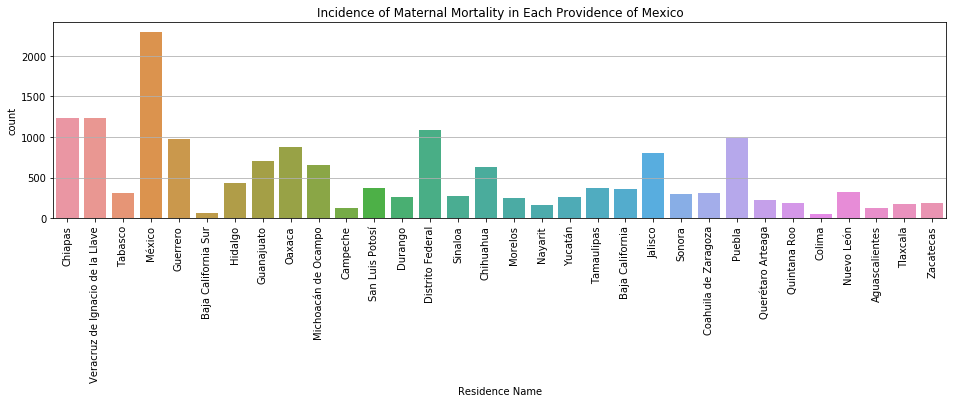

In [37]:
# Create a bar graph to show distribution of incidences of maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
sns.countplot(materna['Residence Name'])

# Label axis 
pl.title('Incidence of Maternal Mortality in Each Providence of Mexico')

*Preliminary Observation*: It appears that certain regions have the incidence of maternal death more prevenantly than others. Further analysis needs to be performed in order to assess the cause of these differences. For now, it's important to understand that each region has a different population size. Are these populations distributed normally?

Text(0.5,1,'Age Distribution of Maternal Mortality within Each Providence of Mexico')

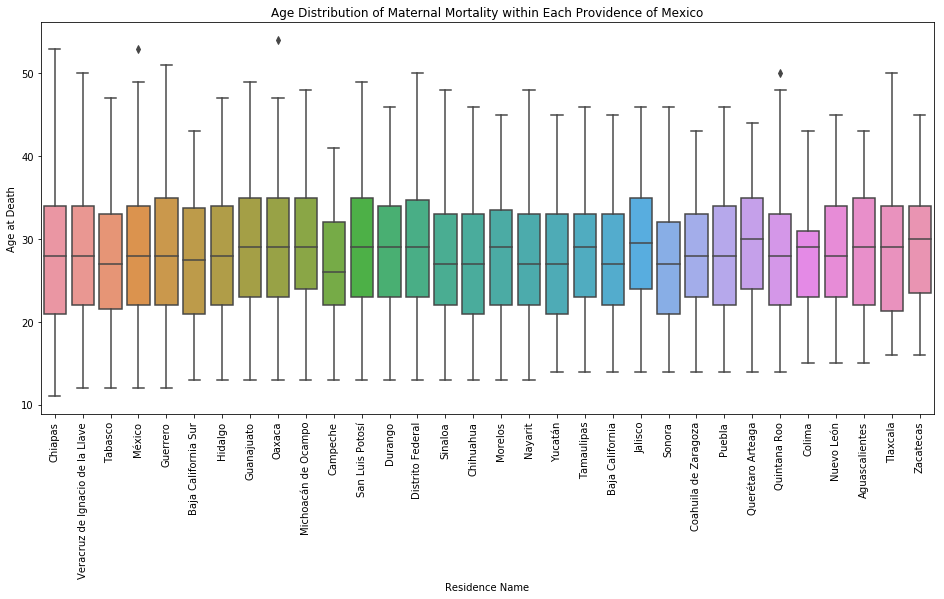

In [38]:
# Create a boxplot to show the distribution of each region compared to its mean
fig, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='vertical')
fig.subplots_adjust(bottom=0.2)
sns.boxplot(x=materna['Residence Name'], y=materna['Age at Death'], data=materna)

# Label axis 
pl.title('Age Distribution of Maternal Mortality within Each Providence of Mexico')

*Preliminary Observation*: As noted above, some Mexican States appear to experience varying instances and age distributions of maternal death. Could this be due to the size of the region or possibly the economic status of the region?

### Step 2: Prepare the Data for Analysis
- Create variables for age distribution by region

In [39]:
# Create a sample region array variables to hold age distribution per region 
# as a model to construct a function to parse through subdataset, region_ages
aqua = materna[materna['Residence Name'] == 'Aguascalientes']
aqua = aqua['Age at Death']
aqua = np.array(aqua)

mex = materna[materna['Residence Name'] == 'México']
mex = mex['Age at Death']
mex = np.array(mex)

print('Aguascalientes Sample Length: '+ str(aqua))
print('México Sample Length: ' + str(mex))

Aguascalientes Sample Length: [15 15 16 16 17 17 17 17 17 17 18 18 18 18 19 19 19 19 20 20 20 20 20 20
 20 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23 24 24 24 25 25 25 25
 25 25 26 26 26 27 27 27 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30
 30 30 31 31 31 31 31 31 31 32 32 32 32 33 33 33 33 33 33 34 34 34 35 35
 35 35 35 35 35 35 35 36 36 36 36 36 37 37 37 38 38 38 39 39 39 39 39 40
 40 41 42 42 42 43 43]
México Sample Length: [12 12 14 ... 49 49 53]


Since it appears that the sample size of ages of maternal death within the Provinces varies, the total sample per Province should be stored in unique age array variables. The process of creating the age array is repeatable, so a function should be created then applied to each Province. The array of ages variable can then be stored in a dictionary as a value with the associated Province as the key.

In [40]:
# Create a function to group all ages associated with materna death within a Province and store the ages in an array

def age_array(str):
    """Create arrays for all Ages of Maternal Death within a Region"""
    
    # Select the region 'str' from the 'Region' column
    ages = materna[materna['Residence Name'] == str]
    
    # Select the ages within the region
    ages = ages['Age at Death'] 
    
    # Store the ages in an array
    ages = np.array(ages)
    
    # return the unique array
    return ages

In [41]:
# Test output
print('Aguascalientes', age_array('Aguascalientes'))
print('México', age_array('México'))

Aguascalientes [15 15 16 16 17 17 17 17 17 17 18 18 18 18 19 19 19 19 20 20 20 20 20 20
 20 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23 24 24 24 25 25 25 25
 25 25 26 26 26 27 27 27 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30
 30 30 31 31 31 31 31 31 31 32 32 32 32 33 33 33 33 33 33 34 34 34 35 35
 35 35 35 35 35 35 35 36 36 36 36 36 37 37 37 38 38 38 39 39 39 39 39 40
 40 41 42 42 42 43 43]
México [12 12 14 ... 49 49 53]


In [42]:
# Create a variable for 'Region' names using np.unique()
list_regions = np.unique(materna['Residence Name'])

# Create an empty dictionary to hold the {Region : region_age_array} key pairs
age_by_state = {}

In [43]:
# Use the age_array function with iteration over residence to create the {Region : region_age_array} key pairs
for region in list_regions:
    
    # Add arrays as values in dictionary with region-key
    age_by_state[region] = age_array(region)

In [44]:
# Test output
print('Aguascalientes', age_by_state['Aguascalientes'])

Aguascalientes [15 15 16 16 17 17 17 17 17 17 18 18 18 18 19 19 19 19 20 20 20 20 20 20
 20 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23 24 24 24 25 25 25 25
 25 25 26 26 26 27 27 27 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30
 30 30 31 31 31 31 31 31 31 32 32 32 32 33 33 33 33 33 33 34 34 34 35 35
 35 35 35 35 35 35 35 36 36 36 36 36 37 37 37 38 38 38 39 39 39 39 39 40
 40 41 42 42 42 43 43]


In [45]:
# Create a sub-dataframe with residence name, code, and population size (unique)

# Var for residence name 
residence_uniq = np.unique(materna['Residence Name'])

# Var for residence code
residence_code = np.unique(materna['Residence Code'])

# Create the sub-dateframe for region and region code
res_dataset = pd.DataFrame(residence_uniq, index=residence_code)
res_dataset = res_dataset.rename(columns={0:'Region'})
res_dataset.head()

,Region
1,Aguascalientes
2,Baja California
3,Baja California Sur
4,Campeche
5,Chiapas


In [46]:
# Calculate the mean age per region
# This section has test trials per entry to help formulate an iteration function

mean_death_list_trial = []

aguas = materna[materna['Residence Code'] == 1 ]
aguas = aguas[['Residence Code', 'Age at Death']]
aguas_mean = aguas['Age at Death'].mean()
aguas_mean = '{0:0.2f}'.format(aguas_mean)
print(aguas_mean)

mean_death_list_trial.append(aguas_mean)
print(mean_death_list_trial)

baja = materna[materna['Residence Code'] == 2 ]
baja = baja[['Residence Code', 'Age at Death']]
baja_mean = baja['Age at Death'].mean()
baja_mean = '{0:0.2f}'.format(baja_mean)
print(baja_mean)

mean_death_list_trial.append(baja_mean)
print(mean_death_list_trial)

28.36
['28.36']
27.15
['28.36', '27.15']


In [47]:
# Create an empty list to store region sample size and mean age of maternal death
region_mean = []
region_n = []

# Create an iteration function to calculate the mean age of maternal death per region
for i in materna['Residence Code'].sort_values().unique():
    """Calculate Length of Age Array and Mean Age per Region"""
    
    #select one region
    sub_df = materna[materna['Residence Code'] == (i - 1)]
    
    #calculate sample length
    n = len(sub_df['Age at Death'])
    
    #calculate mean of region
    mean = sub_df['Age at Death'].mean()
    
    # append n and mean to region list
    region_n.append(round(n, 2))
    region_mean.append(round(mean, 2)) 

In [48]:
# Test output
print(region_mean[1], region_n[1], type(region_mean[1]))
print(region_mean[2], region_n[2], type(region_mean[2]))

28.36 127 <class 'float'>
27.15 361 <class 'float'>


In [49]:
# Convert the list to a Series and add as new column
res_dataset['μ Age Maternal Mortality'] = pd.Series(region_mean)
res_dataset['Region (n)'] = pd.Series(region_n)
res_dataset

,Region,μ Age Maternal Mortality,Region (n)
1,Aguascalientes,28.36,127.0
2,Baja California,27.15,361.0
3,Baja California Sur,27.56,66.0
4,Campeche,26.87,126.0
5,Chiapas,28.02,310.0
6,Chihuahua,27.59,49.0
7,Coahuila de Zaragoza,28.24,1235.0
8,Colima,26.98,628.0
9,Distrito Federal,28.84,1082.0
10,Durango,28.65,263.0


*Preliminary Observation*: Since the region 'Zacatecas' has a NaN value for mean age of maternal death, the contents of 'Zacatecas' need to be adjusted from NaN to the actual mean of the data for the res_dataset. *With a quick reference, the initial values in the res_dataset match the individually calculated mean for both Aguascalientes and Baja California, so we know the NaN is not due to shifted values.*

#### Clean Data by Replacing NaN/Null values with the Correct Data

In [50]:
# Calculate the mean Age of Death for region 'Zacatecas'
zaca = materna[materna['Residence Code'] == 32 ]
zaca = zaca['Age at Death']

# Calculate sample size
zaca_n = len(zaca)

# Calculate mean
zaca_mean = zaca.mean()
zaca_mean = round(mean, 2)
print(zaca_mean)

# Change contents of res_dataset NaN to calculated mean
res_dataset['μ Age Maternal Mortality'] = res_dataset['μ Age Maternal Mortality'].replace(np.nan, zaca_mean)
res_dataset['Region (n)'] = res_dataset['Region (n)'].replace(np.nan, zaca_n)
res_dataset.tail()

27.5


,Region,μ Age Maternal Mortality,Region (n)
28,Tamaulipas,28.26,377.0
29,Tlaxcala,28.45,178.0
30,Veracruz de Ignacio de la Llave,27.94,1239.0
31,Yucatán,27.50,258.0
32,Zacatecas,27.50,191.0


#### Visualize Data

Text(0.5,1,'Regions Compared to Mexico Mean Age Maternal Mortality')

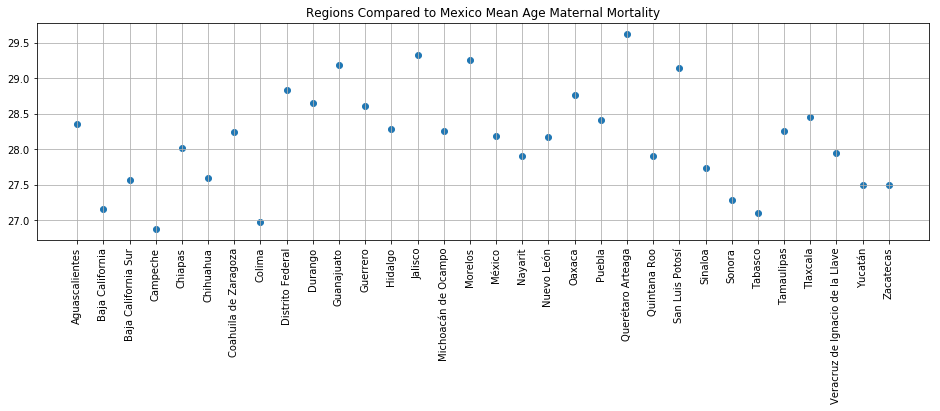

In [51]:
# Create a bar graph to show mean age maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
plt.scatter(res_dataset['Region'], res_dataset['μ Age Maternal Mortality'])

# Label axis 
pl.title('Regions Compared to Mexico Mean Age Maternal Mortality')

***Further Investigation Needed***: The difference between the means of each region within Mexico needs to be analyzed to evaluate if theres differences are statistically significant. This can be accomplished by running an ANOVA analysis.

### Step 3: Statistical Inference - ANOVA Examination

A **One-Way Analysis of Variance (ANOVA)** test compares the means of two or more groups to determine if at least one group mean is statistically different from the others. These assumptions that must be satisfied in order for the associated p-value to be valid:

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. (homoscedasticity)

#### 1. Samples must be Random / Independent
- 10% Rule: If sample size (n) for each Mexican State is less than 10% of the total population within that State, than each sample selection can be treated as an independent event

In [52]:
# Open metro_by_region with specific population values of each Mexican State by region
%store -r state_pop
state_pop

,State(s),Population 2010,Population 2015
0,Aguascalientes,932369.0,1044049.0
1,Baja California,3155070.0,3315766.0
2,Baja California Sur,251871.0,272711.0
3,Campeche,259005.0,283025.0
4,Chiapas,1058712.0,1162592.0
5,Chihuahua,2478246.0,2616912.0
6,Ciudad de México / Hidalgo / México,20116842.0,20892724.0
7,Coahuila de Zaragoza,2614817.0,2823877.0
8,Colima,475661.0,512182.0
9,Durango,582267.0,654876.0


#### Assess if sample age arrays by State are Independent

In [53]:
# Verify both age_by_state and state_pop both contain all 32 Mexican States/Regions 
len(list(age_by_state.keys())), len(state_pop)

(32, 32)

In [54]:
# Modify state_pop to contain the extact same string value for State
state_pop['State'] = age_by_state.keys()
state_pop.head()

,State(s),Population 2010,Population 2015,State
0,Aguascalientes,932369.0,1044049.0,Aguascalientes
1,Baja California,3155070.0,3315766.0,Baja California
2,Baja California Sur,251871.0,272711.0,Baja California Sur
3,Campeche,259005.0,283025.0,Campeche
4,Chiapas,1058712.0,1162592.0,Chiapas


In [55]:
for state in age_by_state:
    
    # Select age arr
    age_arr = age_by_state[state]
    
    # Calculate State age sample size
    age_length = len(age_arr)
    
    # Select State row in state_pop
    state_row = state_pop[state_pop['State'] == state]
    
    # Calculate 10% state_pop State populations in 2010 and 2015
    #2010
    ten_percent_2010 = round(float(state_row['Population 2010'])**0.1, 2)
    #2015
    ten_percent_2015 = round(float(state_row['Population 2015'])**0.1, 2)
    
### OVER ESTIMATION - If Women are only 30% of Population ###
    
    # Calculate 10% of 30% of state_pop State populations in 2010 and 2015
    #2010
    state_10_30 = round(float(state_row['Population 2010'])**0.3, 2)
    ten_percent_10_30 = round(state_10_30**0.1,2)
    #2015
    state_15_30 = round(float(state_row['Population 2015'])**0.3, 2)
    ten_percent_15_30 = round(state_10_30**0.1,2)
        
    # Set condition: Compare age_length to 10% State populations in 2010 and 2015
    if age_length > ten_percent_2010 and age_length > ten_percent_2015:
        print('Accept Independence: ', state)
    else: 
        print('REJECT: ', state)
    
    if age_length > ten_percent_10_30 and ten_percent_10_30:
         print('Accept Independence - Over-Estimation: ', state)
    else: 
        print('REJECT - Over-Estimation: ', state)

Accept Independence:  Aguascalientes
Accept Independence - Over-Estimation:  Aguascalientes
Accept Independence:  Baja California
Accept Independence - Over-Estimation:  Baja California
Accept Independence:  Baja California Sur
Accept Independence - Over-Estimation:  Baja California Sur
Accept Independence:  Campeche
Accept Independence - Over-Estimation:  Campeche
Accept Independence:  Chiapas
Accept Independence - Over-Estimation:  Chiapas
Accept Independence:  Chihuahua
Accept Independence - Over-Estimation:  Chihuahua
Accept Independence:  Coahuila de Zaragoza
Accept Independence - Over-Estimation:  Coahuila de Zaragoza
Accept Independence:  Colima
Accept Independence - Over-Estimation:  Colima
Accept Independence:  Distrito Federal
Accept Independence - Over-Estimation:  Distrito Federal
Accept Independence:  Durango
Accept Independence - Over-Estimation:  Durango
Accept Independence:  Guanajuato
Accept Independence - Over-Estimation:  Guanajuato
Accept Independence:  Guerrero
Acc

**Independence Conclusion**: Since the dataset for the incidence of maternal mortality within each Mexican States/Region is less than 10% of the recorded populations of each State in both 2010 and 2015, each data point can be treated as an independent variable. **Independence is Accepted**

#### 2. Samples must be Normally Distributed

Within the SciPy module of python 3, there is a normalcy function that tests the null hypothesis that a sample comes from a normal distribution. It is based on **D’Agostino** and **Pearson’s test** that combines skew and kurtosis to test of normality. This function be used to further determine if the distribution of each Province sample population is normally distributed.

In [56]:
# Create a variable to hold list of Regions with normally-distributed sample sizes
norm_distr_regions = []

# Create a variable to hold list of Regions without normally-distributed sample sizes
not_norm_distr_regions = []

# Determine if each Province has a normally distributed sample population of ages

for region in age_by_state:
    """Determine if Region Age Distribution is Normal"""
    
    # Select age array by Region key in database
    region_name = str(region)
    arr = age_by_state[region_name]
    
    # Skewtest (k2) is not valid with less than 8 samples
    if len(arr) > 8:
        
        # Test for normalcy of distribution (with Skewtest)   
        k2, p = stats.normaltest(arr)

        # Set significance level to 95% confidence
        alpha = 0.05
        print("p = {:g}".format(p))
        print("n = " + str(len(arr)))

        # Print result for each region normalcy test
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            print(str(region)+ " IS normally distributed.")
            
            # Add region to list of regions for statistical analysis
            norm_distr_regions.append(region_name)
            
        else:
            print(str(region)+ " *IS NOT* normally distributed.")
              
            # Add region to list of regions NOT for statistical analysis
            not_norm_distr_regions.append(region_name)
                
    else: 
        print(str(region)+ " *sample size is too small*")
        
        # Add region to list of regions NOT for statistical analysis
        not_norm_distr_regions.append(region_name)

p = 8.92987e-06
n = 127
Aguascalientes IS normally distributed.
p = 9.69442e-10
n = 361
Baja California IS normally distributed.
p = 0.00564503
n = 66
Baja California Sur IS normally distributed.
p = 0.00137276
n = 126
Campeche IS normally distributed.
p = 1.03976e-37
n = 1235
Chiapas IS normally distributed.
p = 8.42917e-19
n = 628
Chihuahua IS normally distributed.
p = 1.6423e-09
n = 310
Coahuila de Zaragoza IS normally distributed.
p = 0.788087
n = 49
Colima *IS NOT* normally distributed.
p = 2.13913e-21
n = 1082
Distrito Federal IS normally distributed.
p = 8.83805e-06
n = 263
Durango IS normally distributed.
p = 6.25818e-14
n = 707
Guanajuato IS normally distributed.
p = 6.26788e-20
n = 977
Guerrero IS normally distributed.
p = 1.22187e-06
n = 428
Hidalgo IS normally distributed.
p = 3.85647e-24
n = 802
Jalisco IS normally distributed.
p = 3.0739e-14
n = 654
Michoacán de Ocampo IS normally distributed.
p = 1.07763e-05
n = 243
Morelos IS normally distributed.
p = 1.9078e-37
n = 229

In [57]:
print('Not Normally Distributed: ', list(np.unique(not_norm_distr_regions)))

Not Normally Distributed:  ['Colima', 'Quintana Roo']


**Normalcy Conclusion**: After assessing the distribution of age of maternal death within each Province of Mexico, **all Province sample populations are considered to be normally distributed** *aside from* Colima (p-value: 2.13913e-21, n=1082) Quintana Roo (p-value: 0.00022599, n=375), which were found to *not be normally distributed*. 

However, under the Central Limit Theorem (CLT), the sampling distribution of the sample means approaches a normal distribution as the sample size ( n ) gets larger - regardless of what the shape of the population distribution. Under this theorem,  n>30  is considered a large sample size. *Since the current database sample size (n) of Colima and Quintana Roo of 1082 and 375, respectively, justify CLT being assumed.* 

#### 3. Homogeneity of Variance: All comparison groups have the same variance with Barlett's Test.
- Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances for samples from significantly normal population distributions. 
- *Extra Analysis*: Calculate the standard deviation and variance of each population

#### Bartlett’s Test for Homogeneity of Variance
$H$o: All region age of maternal mortality populations have equal variance. <br>  $v$1 = $v$2 = $v$3 = .... = $v$32

$H$a: There is at least one region age of maternal mortality population variance is statistically different from the rest. <br> $v$1 ≠ $v$2 = .... = $v$32

Significance Level: *95%* Confidence. <br> $α$ = 0.05

In [58]:
# Calculate the age variance per region - This section has test trials per entry to help formulate an iteration function

# Aquascalientes and Baja California
print(stats.bartlett(age_by_state['Aguascalientes'], age_by_state['Baja California']))

# Aquascalientes and Baja California Sur
print(stats.bartlett(age_by_state['Aguascalientes'], age_by_state['Baja California Sur']))

BartlettResult(statistic=1.5499938218119378, pvalue=0.2131363529440692)
BartlettResult(statistic=0.0026360082272445526, pvalue=0.959052944694013)


*Preliminary* **Conclusion for Homogeneity of Variance**: Even before calculating all Bartlett results between region populations, it is evident that not all regions have the same variance. Therefore, **the null hypothesis is rejected: there is at least one region age of maternal mortality with a population variance statistically different from the rest**. Luckily, the proof for ANOVA test is robust, so slight variations from its proof criteria are  OK (source: https://faculty.elgin.edu/dkernler/statistics/ch13/13-1.html). As a good rule of thumb, *as long as the largest variance is no more than double the smallest, we can assume ANOVA's requirement for Homogeneity of Variance is satisfied.*

#### Evaluate the differences between the largest and smallest Region variances in Mexico.

In [59]:
# Calculate the age standard deviation and variance per region - 
# This section has test trials per entry to help formulate an iteration function

aguas = materna[materna['Residence Code'] == 1 ]
aguas = aguas[['Residence Code', 'Age at Death']]
aguas_var = statistics.pvariance(aguas['Age at Death'])

print('Aguas', aguas_var)

baja = materna[materna['Residence Code'] == 2 ]
baja = baja[['Residence Code', 'Age at Death']]
baja_var = statistics.pvariance(baja['Age at Death'])

print('Baja Cal', baja_var)

Aguas 55.16014632029264
Baja Cal 46.31196814020764


In [60]:
# Create an empty list to store age of maternal death variance per region
region_var = []

# Create an iteration function
for i in materna['Residence Code'].sort_values().unique():
    """Calculate Age Standard Deviation and Age Variance per Region"""
    
    #select one region
    sub_df = materna[materna['Residence Code'] == i]
    age = list(sub_df['Age at Death'])
    
    # calculate age variance of region population with pstdev()
    var = statistics.pvariance(age)
    
    # prevent repeat entries in lists
    for region in sub_df['Residence Name'].unique():
   
        # append var to region list
        region_var.append(round(var, 2)) 

In [61]:
# Convert the list to a Series and add as new column
res_dataset['μ Age Variance'] = pd.Series(region_var, index=np.arange(1,33))
res_dataset.head()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance
1,Aguascalientes,28.36,127.0,55.16
2,Baja California,27.15,361.0,46.31
3,Baja California Sur,27.56,66.0,55.37
4,Campeche,26.87,126.0,44.29
5,Chiapas,28.02,310.0,45.02


In [62]:
# Test output - Make sure it matches Test Results
print('Test Results - Aguas', round(aguas_var,2))
print('Function Results - Aguas', region_var[0])

Test Results - Aguas 55.16
Function Results - Aguas 55.16


In [63]:
# Create variables for minimum and maximum variation values in res_dataset
max_variance = res_dataset['μ Age Variance'].max()
print('Max Variance: ', max_variance)

min_variance = res_dataset['μ Age Variance'].min()
print('Min Variance: ', min_variance)
print('Double Min Variance: ', min_variance*2)

# Check if largest variance is more than double the smallest
if (2*min_variance) >= max_variance:
    print('Accept ANOVA: The max variance is less than double the min variance.')
else: 
    print('Reject ANOVA: The max variance is more than double the min variance.')

Max Variance:  61.58
Min Variance:  40.12
Double Min Variance:  80.24
Accept ANOVA: The max variance is less than double the min variance.


**Final Conclusion for Homogeneity of Variance**: Since the maximum variance within the dataset (61.68) is less than double the minimum variance within the dataset (40.12, whichs doubles to 80.24), we can assume ANOVA's requirement for Homogeneity of Variance is satisfied.

## Calculate One-Way Analysis of Variance

$H$o: All mean age of death of maternal women within all Province of Mexico are statistically similar. <br>  $μ$1 = $μ$2 = $μ$3 = .... = $μ$32

$H$a: There is at least one mean age of death of maternal women within a Province of Mexico that is statistically different from the rest. <br> $μ$1 ≠ $μ$2 = .... = $μ$32

Significance Level: *95%* Confidence. <br> $α$ = 0.05

In [64]:
# Define the number of conditions (k) based on Region/State
k = len(pd.unique(materna['Residence Name']))
print('Number of Conditions(k): ', k)

# Calculate the conditions times data points (N)
N = len(materna.values)
print('Number of Conditions times Data Points(N): ', N)

# Participants in each condition
n = materna.groupby('Residence Name').size()[0] 
print('Number of Participants in Each Condition(n): ', n)

Number of Conditions(k):  32
Number of Conditions times Data Points(N):  16631
Number of Participants in Each Condition(n):  127


#### Visualize the Data

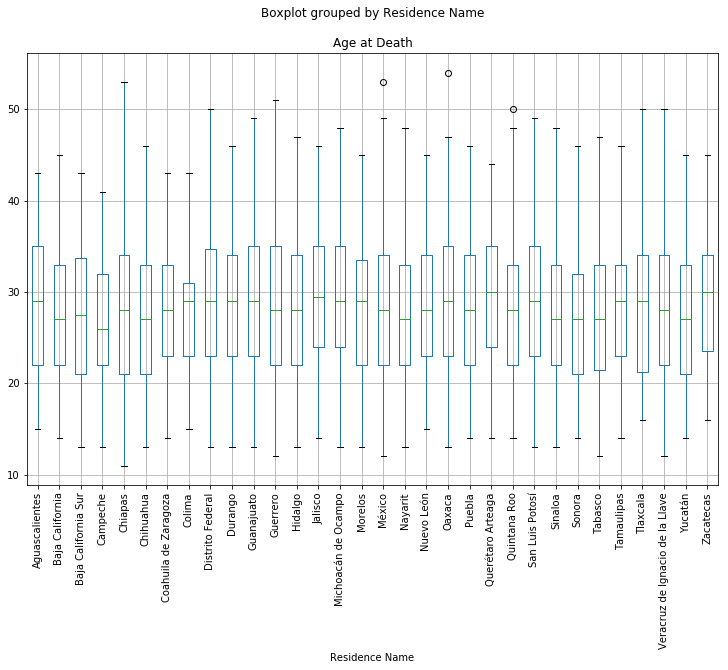

In [65]:
#Create a boxplot
materna.boxplot('Age at Death', by='Residence Name', figsize=(12, 8))
plt.xticks(rotation='vertical')

#Create a dict variable for key:value pairs of state:age_array
grps = pd.unique(materna['Residence Name'].values)
state_mean_ages = {grp:materna['Age at Death'][materna['Residence Name'] == grp] for grp in grps}

#### Calculate the ANOVA F- value and p-value using stats module

In [66]:
F, p = stats.f_oneway(state_mean_ages['Aguascalientes'], 
                      state_mean_ages['Baja California'], 
                      state_mean_ages['Baja California Sur'],
                      state_mean_ages['Campeche'],
                      state_mean_ages['Chiapas'],
                      state_mean_ages['Chihuahua'],
                      state_mean_ages['Coahuila de Zaragoza'],
                      state_mean_ages['Colima'],
                      state_mean_ages['Distrito Federal'],
                      state_mean_ages['Durango'],
                      state_mean_ages['Guanajuato'],
                      state_mean_ages['Guerrero'],
                      state_mean_ages['Hidalgo'],
                      state_mean_ages['Jalisco'],
                      state_mean_ages['Michoacán de Ocampo'],
                      state_mean_ages['Morelos'],
                      state_mean_ages['México'],
                      state_mean_ages['Nayarit'],
                      state_mean_ages['Nuevo León'],
                      state_mean_ages['Oaxaca'],
                      state_mean_ages['Puebla'],
                      state_mean_ages['Querétaro Arteaga'],
                      state_mean_ages['Quintana Roo'],
                      state_mean_ages['San Luis Potosí'],
                      state_mean_ages['Sinaloa'],
                      state_mean_ages['Sonora'],
                      state_mean_ages['Tabasco'],
                      state_mean_ages['Tamaulipas'],
                      state_mean_ages['Tlaxcala'],
                      state_mean_ages['Veracruz de Ignacio de la Llave'],
                      state_mean_ages['Yucatán'],
                      state_mean_ages['Zacatecas'])

print('ANOVA F-value: ', str(F))
print('ANOVA p-value: ', str(p))
print('alpha level: 0.05')

ANOVA F-value:  3.9898710094367247
ANOVA p-value:  5.792391015154357e-13
alpha level: 0.05


**ANOVA Conclusion**: ANOVA was performed using a confidence level of 95%. The resulting p-value was 5.79x10-13, which is substantially smaller than α = 0.05. Thus, **the null hypothesis is rejected: the differences in mean age of maternal mortality across the regions in Mexico are statistically different**. Since adolescent maternal mortality is one of the key factors that lowers the mean age per region, it would be beneficial to calculate the mean age adolescent maternal mortality in preparation for the machine learning assessment of mean maternal age of mortality.

## Question 3: Since the Differences of Means Maternal is Statistically Significant, how do the Region Mean Ages Compare to the Mexico's National Mean Age Maternal Mortality?  
**Create Binary Columns**: 

μ Age 
- 0 : Region μ Age Maternal Mortality is *greater than or equal to* the population mean
- 1 : Region μ Age Maternal Mortality is *less than* the population mean

In [67]:
print('The population mean is: ', round(mean_age, 2))

The population mean is:  28.36


In [68]:
# Create a dictionary item to hold comparison response
binary_mean = []

# Create an iteration function to compare region mean to popupation mean
for mean in res_dataset['μ Age Maternal Mortality']:
    
    #test for mean
    if mean >= mean_age:
        binary_mean.append(0)
    else:
        binary_mean.append(1)

In [69]:
# Test output
#binary_mean

In [70]:
# Convert the list to a Series and add as new column
res_dataset['Above(0) or Below(1) Average'] = pd.Series(binary_mean, index=np.arange(1,33))
res_dataset.head()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average
1,Aguascalientes,28.36,127.0,55.16,0
2,Baja California,27.15,361.0,46.31,1
3,Baja California Sur,27.56,66.0,55.37,1
4,Campeche,26.87,126.0,44.29,1
5,Chiapas,28.02,310.0,45.02,1


#### Visualize Data

Text(0.5,1,'Mean Age Maternal Mortality in Each Providence of Mexico')

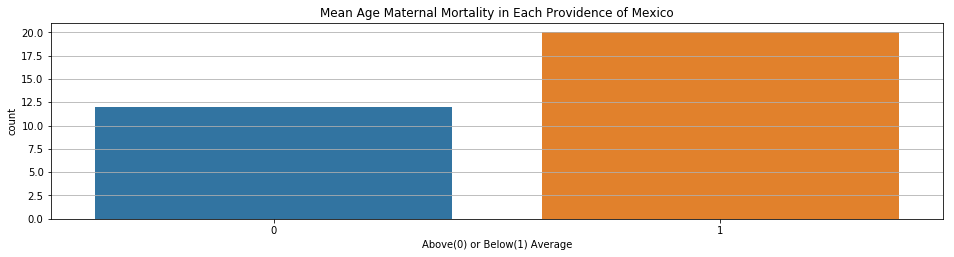

In [71]:
# Create a bar graph to show mean age maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
sns.countplot(res_dataset['Above(0) or Below(1) Average'])

# Label axis 
pl.title('Mean Age Maternal Mortality in Each Providence of Mexico')

In [72]:
# List Regions with a mean maternal mortality lower than population mean
len(res_dataset[res_dataset['Above(0) or Below(1) Average'] == 1])

20

*Preliminary Assessment*: It appears that more than half of Mexico's Regions (20 of 32) have a lower mean age of maternal mortality than the remaining 12. What are the major differences between these regions? 

## Question 4: Since the Differences of Means Maternal is Statistically Significant, how do the Region Mean Ages Compare to the Mexico's National Mean Age Maternal Mortality?  
- The World Health Organization (WHO) states that an upwards of 13 million *adolescent girls (ages under 20)* give birth every year, and complications from those pregnancies and childbirth are a leading cause of death for those young mothers. 

#### Create a subdf for adolescent maternal mortality within the datase

In [73]:
adolescent_matern_mortality = materna[materna['Age at Death'] <= 20 ]
adolescent_matern_mortality.head()

,Residence Code,Residence Name,Local Community Size,Education Completed,Age at Death,Received(0)/Not(1) Medical Assistance
0,7,Chiapas,1 a 999 habitantes,2,11,0.0
1,30,Veracruz de Ignacio de la Llave,50000 a 74999 habitantes,3,12,0.0
2,27,Tabasco,250000 a 499999 habitantes,4,12,0.0
3,15,México,2500 a 4999 habitantes,5,12,0.0
4,12,Guerrero,2500 a 4999 habitantes,2,12,1.0


#### Create variables for age distribution by region

In [74]:
# Create a variable for adolescent_ages_maternal_mortality
adolescent_ages = adolescent_matern_mortality['Age at Death']

# Create a variable for adolsecent_sample_size
adolsecent_sample_size = len(adolescent_ages)
adolsecent_sample_size

2885

#### Visualize the Spread of the Data

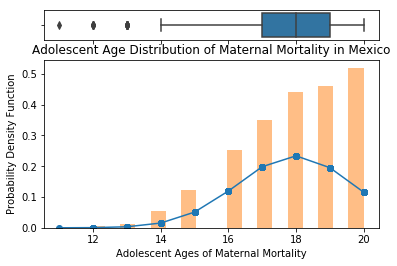

'The sample(n=2885) population mean age of adolescent maternal mortality is 17.98 years old with a standard deviation of 1.71.'

In [75]:
# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(adolescent_ages, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(adolescent_ages, np.mean(adolescent_ages), np.std(adolescent_ages))
pl.plot(adolescent_ages, fit, '-o')
pl.hist(adolescent_ages, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Adolescent Ages of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Adolescent Age Distribution of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(adolsecent_sample_size) + ') population mean age of adolescent maternal mortality is ' + str(round(np.mean(adolescent_ages), 2)) + ' years old with a standard deviation of ' + str(round(np.std(adolescent_ages), 2)) + '.'

*Preliminary Observation*: The distribution appears to have a skewed-right distributed based off of the histogram and boxplot of instance of adolescent maternal mortality. 

### Step 3: Inferential Statistics - Bootstrap Simulation: Compare the Sample Mean to a Statistically-Likely Population Mean

#### Statistical Testing of Data Mean Adolescent Mortality

$H$o: The mean adolescent age of maternal mortality in Mexico is equal to the mean adolescent age of maternal mortality presented in the dataset ($17.98 yoa$). <br>  Empirical Mean ($μ$) − Population Mean ($μ$) = 0

$H$a: The mean adolescent age of maternal mortality in Mexico is *not* equal to the mean adolescent age of maternal mortality presented in the dataset ($17.98 yoa$). <br> Empirical Mean ($μ$) − Population Mean ($μ$) ≠ 0

Significance Level: *95%* Confidence. <br> $α$ = 0.05

#### Calculate adolescent mean age maternal morality

In [76]:
# Create variables for sample statistical information
adolescent_ages_std = adolescent_ages.std()
mean_adolescent_ages = adolescent_ages.mean()

# Create an array of the sample mean that is equal to the boostrap array length
adolescent_ages_arr = np.full(10000, mean_adolescent_ages)

print('sample size: ', adolsecent_sample_size)
print('sample mean age of death: ', mean_adolescent_ages)
print('sample standard deviation: ', adolescent_ages_std)

sample size:  2885
sample mean age of death:  17.97677642980936
sample standard deviation:  1.7061774866900203


#### Create a 10,000 bootstrap replication with boostrap replicate functions

In [77]:
# Create 10000 bootstrap replicates of the mean and take the mean of the returned array
boot_tenthousand =  draw_bs_reps(adolescent_ages, np.mean, size=10000)
print('bootstrap mean adolescent age of death: ' + str(np.mean(boot_tenthousand)))

bootstrap mean adolescent age of death: 17.976516568457537


#### Calculate the difference between the bootrap and sample means with p-value and standard deviation

In [78]:
# Compute p-value
p_val = np.sum(boot_tenthousand >= adolescent_ages_arr) / len(boot_tenthousand)
print('p-value: {0:0.4f}'.format(p_val))

# Calculate the standard margin of error for a 95% confidence interval
conf_int_low = mean_adolescent_ages-(1.98*(adolescent_ages_std/math.sqrt(adolsecent_sample_size)))
conf_int_high = mean_adolescent_ages+(1.98*(adolescent_ages_std/math.sqrt(adolsecent_sample_size)))
print('95% Confidence Interval: [{0:0.4f}  {1:0.4f}]'.format(conf_int_low, conf_int_high))

p-value: 0.4990
95% Confidence Interval: [17.9139  18.0397]


**Conclusion from the Bootstrap Hypothesis Test:** The resulting population mean of maternal death approximation based on 10,000 bootstrap replicate samples was *17.9765 years of age (yoa)*, which is close to the sample mean of *17.9767 (yoa)* from the dataset. Additionally, the bootstrap population mean is within the 95% Confidence Interval, *17.9139 to 18.0397 (yoa)* with a p-value of 0.4990, which is greater than α = 0.05. Therefore, the null hypothesis that the mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset can be accepted. **$Ho$ is accepted**.

### Step 4: Exploratory Data Analysis of State Means

#### Visualize the distribution of Mean Age of Adolsecent Maternal Death

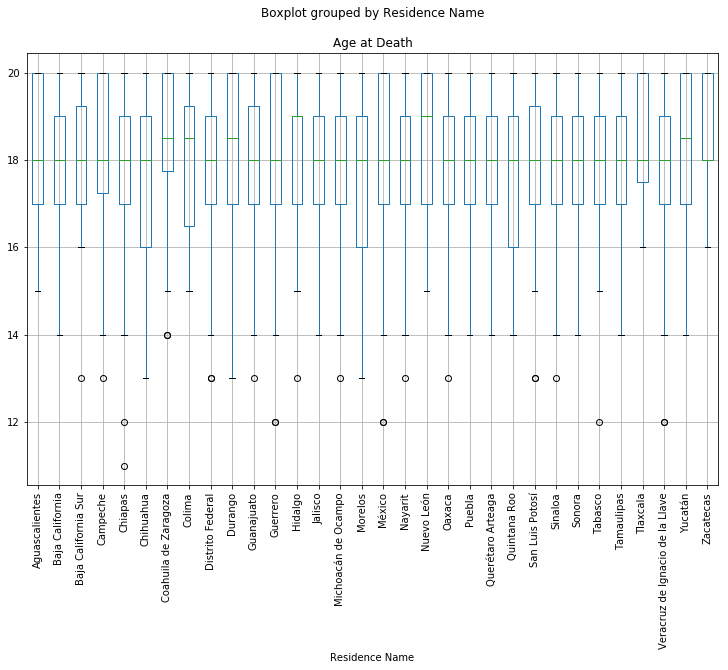

In [79]:
#Create a boxplot
adolescent_matern_mortality.boxplot('Age at Death', by='Residence Name', figsize=(12, 8))
plt.xticks(rotation='vertical')

#Create a dict variable for key:value pairs of state:age_array
grps = pd.unique(adolescent_matern_mortality['Residence Name'].values)
state_mean_adolescent_ages = {grp:adolescent_matern_mortality['Age at Death'][adolescent_matern_mortality['Residence Name'] == grp] for grp in grps}

*Preliminary Observations*: When visualizing the spread of adolescent maternal mortality by region, it appears there there are several regions with outliers of very young ages of maternal mortality. Since outliers not incorporated in the calculation of the mean, the adolescent age arrays should be added to the res_dataset and included in the Linear Regression analysis.

#### Calculate Mean Age, Variance, and Number Instances of Adolescent Maternal Mortality by Region

In [80]:
# Create an empty list to store mean age and sample size of maternal death per region
ado_region_mean = []
ado_region_n = []

# Create an iteration function
for i in adolescent_matern_mortality['Residence Code'].sort_values().unique():
    """Calculate Mean Age Adolescent Maternal Mortality per Region"""
    
    #select one region
    sub_df = adolescent_matern_mortality[adolescent_matern_mortality['Residence Code'] == i]
    age = sub_df['Age at Death']
   
    #calculate sample length
    ado_n = len(age)
    
    #calculate mean
    ado_mean = age.mean()
    
    #prevent repeat entries in lists
    for region in sub_df['Residence Name'].unique():
       
        # append mean to region list
        ado_region_mean.append(round(ado_mean, 2))
        
        # append ado_n to region list
        ado_region_n.append(round(ado_n, 2))

In [81]:
# Test output
len(ado_region_mean), ado_region_mean[31]

(32, 18.52)

In [82]:
# Test output
len(ado_region_n), ado_region_n[31]

(32, 23)

#### Add Variables to res_dataset

In [83]:
# Convert the list to a Series and add as new column
res_dataset['μ Age Adolescent Maternal Death'] = pd.Series(ado_region_mean, index=np.arange(1,33))
res_dataset['Region Ado (n)'] = pd.Series(ado_region_n, index=np.arange(1,33))
res_dataset.head()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Region Ado (n)
1,Aguascalientes,28.36,127.0,55.16,0,18.08,25
2,Baja California,27.15,361.0,46.31,1,18.00,69
3,Baja California Sur,27.56,66.0,55.37,1,18.00,16
4,Campeche,26.87,126.0,44.29,1,18.00,22
5,Chiapas,28.02,310.0,45.02,1,18.33,52


In [84]:
# Test output
res_dataset.tail()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Region Ado (n)
28,Tamaulipas,28.26,377.0,45.45,1,17.88,59
29,Tlaxcala,28.45,178.0,55.16,0,18.37,35
30,Veracruz de Ignacio de la Llave,27.94,1239.0,53.60,1,17.95,236
31,Yucatán,27.50,258.0,54.89,1,18.12,58
32,Zacatecas,27.50,191.0,48.10,1,18.52,23


#### Clean Data by Replacing NaN/Null values with the Correct Data

In [86]:
# Calculate the mean Age of Death for region 'Zacatecas'
ado_zaca = adolescent_matern_mortality[adolescent_matern_mortality['Residence Code'] == 32 ]
ado_zaca = ado_zaca['Age at Death']

# Calculate sample size
ado_zaca_n = len(ado_zaca)

# Change contents of res_dataset NaN to calculated mean
res_dataset['Region Ado (n)'] = res_dataset['Region Ado (n)'].replace(np.nan, ado_zaca_n)
res_dataset.tail()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Region Ado (n)
28,Tamaulipas,28.26,377.0,45.45,1,17.88,59
29,Tlaxcala,28.45,178.0,55.16,0,18.37,35
30,Veracruz de Ignacio de la Llave,27.94,1239.0,53.60,1,17.95,236
31,Yucatán,27.50,258.0,54.89,1,18.12,58
32,Zacatecas,27.50,191.0,48.10,1,18.52,23


### Since there is a statistically significant difference between the region mean ageas of maternal mortality, it is important to compare the binary values of region adolescent maternal mortality compared to Mexico's mean age adolescent mortality.
**Create Binary Column**: 
μ Adolescent Age
- 0 : Region μ Age Adolescent Maternal Mortality is *greater than or equal to* Mexico's μ Age Adolescent Maternal Mortality
- 1 : Region μ Age Adolescent Maternal Mortality is *less than* Mexico's μ Age Adolescent Maternal Mortality

In [87]:
print('The adolescent population mean is: ', round(mean_adolescent_ages, 2))

The adolescent population mean is:  17.98


In [88]:
# Create a list item to hold comparison response
binary_ado_mean = []

# Create an iteration function to compare region mean to popupation mean
for ado_mean in res_dataset['μ Age Adolescent Maternal Death']:
    
    #test for mean
    if ado_mean >= mean_adolescent_ages:
        binary_ado_mean.append(0)
    else:
        binary_ado_mean.append(1)

In [89]:
# Test output
#binary_ado_mean

In [90]:
# Convert the list to a Series and add as new column
res_dataset['Above(0) or Below(1) *Ado* Average'] = pd.Series(binary_ado_mean, index=np.arange(1,33))
res_dataset.head()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Region Ado (n),Above(0) or Below(1) *Ado* Average
1,Aguascalientes,28.36,127.0,55.16,0,18.08,25,0
2,Baja California,27.15,361.0,46.31,1,18.00,69,0
3,Baja California Sur,27.56,66.0,55.37,1,18.00,16,0
4,Campeche,26.87,126.0,44.29,1,18.00,22,0
5,Chiapas,28.02,310.0,45.02,1,18.33,52,0


### Additionally, the proportion of adolescent mortality of all maternal mortalities within a region should be calculated:
**Create Proportion Column**:
Proportion Adolescent Maternal Morality in Total Maternal Mortality

In [91]:
# Create a list variable for proportion adolescent in sample size
proportion_ado_n = []

# Create an iteration function to calculate decimal percent adolescent maternal mortality within a region
for region in res_dataset['Region']:
    
    #select one region
    region_row = res_dataset[res_dataset['Region'] == region]
    
    #select total and adolescent sample size
    total_n = int(region_row['Region (n)'])
    ado_n = int(region_row['Region Ado (n)'])
    
    #take proportion
    prop_ado = ado_n / total_n
    
    #append proportion to list
    proportion_ado_n.append(round(prop_ado, 4))

In [92]:
# Test output
print(len(proportion_ado_n))
#proportion_ado_n

32


In [93]:
# Convert the list to a Series and add as new column
res_dataset['Proportion Ado (n) in Total (n)'] = pd.Series(proportion_ado_n, index=np.arange(1,33))
res_dataset.tail()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Region Ado (n),Above(0) or Below(1) *Ado* Average,Proportion Ado (n) in Total (n)
28,Tamaulipas,28.26,377.0,45.45,1,17.88,59,1,0.1565
29,Tlaxcala,28.45,178.0,55.16,0,18.37,35,0,0.1966
30,Veracruz de Ignacio de la Llave,27.94,1239.0,53.60,1,17.95,236,1,0.1905
31,Yucatán,27.50,258.0,54.89,1,18.12,58,0,0.2248
32,Zacatecas,27.50,191.0,48.10,1,18.52,23,0,0.1204


### Compare region proportion of adolescent maternal mortality to total region maternal mortality to Mexico's proportion
**Create Binary Column**: 
Proportion Adolescent:Total
- 0 : Region Proportion Adolescent Maternal Mortality to Total is *greater than* Mexico's Proportion Adolescent Maternal Mortality to Total
- 1 : Region Proportion Adolescent Maternal Mortality to Total is *less than or equal to* Mexico's Proportion Adolescent Maternal Mortality to Total

In [99]:
# Create a variable to calculate the proportion ado: total
population_proportion = round(adolsecent_sample_size / sample_size, 4)

print('The total sample size in the dataset is: ', sample_size)
print('The adolescent sample size in the dataset is: ', adolsecent_sample_size)
print('The proportion of adolescent to total maternal mortality instances is: ', population_proportion)

The total sample size in the dataset is:  16636
The adolescent sample size in the dataset is:  2885
The proportion of adolescent to total maternal mortality instances is:  0.1734


In [100]:
# Create a list item to hold comparison response
binary_ado_prop = []

# Create an iteration function to compare region mean to popupation mean
for ado_prop in res_dataset['Proportion Ado (n) in Total (n)']:
    
    #test for mean
    if ado_prop >= population_proportion:
        binary_ado_prop.append(0)
    else:
        binary_ado_prop.append(1)

In [102]:
# Test output
print(len(binary_ado_prop))
#binary_ado_prop

32


In [104]:
# Convert the list to a Series and add as new column
res_dataset['Above(0)/Not(1) Proportion *Ado*(n):Total(n)'] = pd.Series(binary_ado_prop, index=np.arange(1,33))
res_dataset.tail()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Region Ado (n),Above(0) or Below(1) *Ado* Average,Proportion Ado (n) in Total (n),Above(0)/Not(1) Proportion *Ado*(n):Total(n)
28,Tamaulipas,28.26,377.0,45.45,1,17.88,59,1,0.1565,1
29,Tlaxcala,28.45,178.0,55.16,0,18.37,35,0,0.1966,0
30,Veracruz de Ignacio de la Llave,27.94,1239.0,53.60,1,17.95,236,1,0.1905,0
31,Yucatán,27.50,258.0,54.89,1,18.12,58,0,0.2248,0
32,Zacatecas,27.50,191.0,48.10,1,18.52,23,0,0.1204,1


In [105]:
# Drop unnecessary columns
res_dataset = res_dataset.drop(columns=['Region (n)', 'Region Ado (n)'])
res_dataset.head()

,Region,μ Age Maternal Mortality,μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Above(0) or Below(1) *Ado* Average,Proportion Ado (n) in Total (n),Above(0)/Not(1) Proportion *Ado*(n):Total(n)
1,Aguascalientes,28.36,55.16,0,18.08,0,0.1969,0
2,Baja California,27.15,46.31,1,18.00,0,0.1911,0
3,Baja California Sur,27.56,55.37,1,18.00,0,0.2424,0
4,Campeche,26.87,44.29,1,18.00,0,0.1746,0
5,Chiapas,28.02,45.02,1,18.33,0,0.1677,1


## Question 5: How does the average level of Education Completed by individuals who suffered maternal mortality change by Region?
- The World Health Organization (WHO) states that better educated women tend to be healthier, participate more in the formal labor market, earn higher incomes, have fewer children, marry at a later age, and enable better health care and education for their children, should they choose to become mothers. All these factors combined can help lift households, communities, and nations out of poverty.

In [106]:
materna.head()

,Residence Code,Residence Name,Local Community Size,Education Completed,Age at Death,Received(0)/Not(1) Medical Assistance
0,7,Chiapas,1 a 999 habitantes,2,11,0.0
1,30,Veracruz de Ignacio de la Llave,50000 a 74999 habitantes,3,12,0.0
2,27,Tabasco,250000 a 499999 habitantes,4,12,0.0
3,15,México,2500 a 4999 habitantes,5,12,0.0
4,12,Guerrero,2500 a 4999 habitantes,2,12,1.0


#### Calculate mean educational level per Region

In [107]:
# Create an empty list to store region sample size and mean age of maternal death
region_education = []

# Create an iteration function to calculate the mean age of maternal death per region
for i in materna['Residence Code'].sort_values().unique():
    """Calculate Mean Education per Region"""
    
    #select one region
    sub_df = materna[materna['Residence Code'] == i ]
    
    #calculate mean of region
    education = sub_df['Education Completed'].mean()
    
    # append mean to region list
    region_education.append(round(education, 2)) 

In [108]:
# Test output
print(len(region_education))
#region_education

32


In [109]:
# Convert the list to a Series and add as new column
res_dataset['μ Region Education Level'] = pd.Series(region_education, index=np.arange(1,33))
res_dataset.head()

,Region,μ Age Maternal Mortality,μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Above(0) or Below(1) *Ado* Average,Proportion Ado (n) in Total (n),Above(0)/Not(1) Proportion *Ado*(n):Total(n),μ Region Education Level
1,Aguascalientes,28.36,55.16,0,18.08,0,0.1969,0,4.56
2,Baja California,27.15,46.31,1,18.00,0,0.1911,0,4.42
3,Baja California Sur,27.56,55.37,1,18.00,0,0.2424,0,4.83
4,Campeche,26.87,44.29,1,18.00,0,0.1746,0,4.12
5,Chiapas,28.02,45.02,1,18.33,0,0.1677,1,4.75


## Question 6: How does the presence of medical care at time of recorded maternal mortality change by region, based off the materna dataset? 

#### Calculate mean presence of medical care per Region

In [110]:
# Create an empty list to store region sample size and mean age of maternal death
region_medical = []

# Create an iteration function to calculate the mean age of maternal death per region
for i in materna['Residence Code'].sort_values().unique():
    """Calculate Mean Education per Region"""
    
    #select one region
    sub_df = materna[materna['Residence Code'] == i ]
    
    #calculate mean of region
    med_assist = sub_df['Received(0)/Not(1) Medical Assistance'].mean()
    
    # append mean to region list
    region_medical.append(round(med_assist, 2)) 

In [111]:
# Test output
print(len(region_medical))
#region_medical

32


In [112]:
# Convert the list to a Series and add as new column
res_dataset['μ Presence(0)/Not(1) of Medical Assistance ATD'] = pd.Series(region_medical, index=np.arange(1,33))
res_dataset.head()

,Region,μ Age Maternal Mortality,μ Age Variance,Above(0) or Below(1) Average,μ Age Adolescent Maternal Death,Above(0) or Below(1) *Ado* Average,Proportion Ado (n) in Total (n),Above(0)/Not(1) Proportion *Ado*(n):Total(n),μ Region Education Level,μ Presence(0)/Not(1) of Medical Assistance ATD
1,Aguascalientes,28.36,55.16,0,18.08,0,0.1969,0,4.56,0.16
2,Baja California,27.15,46.31,1,18.00,0,0.1911,0,4.42,0.16
3,Baja California Sur,27.56,55.37,1,18.00,0,0.2424,0,4.83,0.16
4,Campeche,26.87,44.29,1,18.00,0,0.1746,0,4.12,0.14
5,Chiapas,28.02,45.02,1,18.33,0,0.1677,1,4.75,0.12


In [113]:
# Store new dates as a global variable that can be uploaded to other Jupyter Notebooks
%store res_dataset

Stored 'res_dataset' (DataFrame)


#### Now that res_dataset has been completed with all mean age and mean adolescent age maternal mortality by region, it is now time to merge this information with region population and GDP information.
- This requires the combination of res_dataset (with each Region mean and variance for total and adolescent maternal mortality), metro_by_region (with Metropolitan Areas organized by Region), and mexico_gdp (with GDP values organized by Metropolitan Areas).